Without air resistance, the x and y coordinates of the ball follow
$$
\begin{align}
y(t)&=v_i\sin(\theta)t - \frac{1}{2}gt^2 \\
x(t)&=v_i\cos(\theta)t
\end{align}
$$

Thus, we can express y in terms of x as such:
$$
\begin{align}
y(t)&=x\tan(\theta) - \frac{g}{2v_i^2\cos^2(\theta)}x^2 \\
\end{align}
$$

and the range of the projectile as
$$
d=\frac{g\sin(\theta)\cos(\theta)}{2v_i^2}=\frac{g\sin(2\theta)}{4v_i^2}
$$

With air resitance, the equation of motion (vector form) is:
$$
m\vec{a} = m\vec{g} - k|\vec{v_{rel}}|^2 \hat{v_{rel}}
$$
Where $\vec{v_{rel}}=\vec{v}-\vec{v_{wind}}$ is the relative velocity of the ball to the wind

Splitting into components and dividing by m:
$$
\begin{align}
\ddot{x} &= -\frac{k}{m} \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{x}-v_{wind}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}} \\
\ddot{y} &= -mg-\frac{k}{m} \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{y}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}}
\end{align}
$$

Note that $m$ and $k$ only appear in the form $\frac{k}{m}$, so we can redefine $k$ to be $\frac{k}{m}$:
$$
\begin{align}
\ddot{x} &= -k \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{x}-v_{wind}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}} \\
\ddot{y} &= -mg-k \left(\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2\right) \frac{\dot{y}}{\sqrt{\left(\dot{x}-v_{wind}\right)^2+\dot{y}^2}}
\end{align}
$$

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [51]:
def projectile_launch(t, vec, k, g, v_wind):
    x, xp, y, yp = vec
    return [
        xp,
        - k * (xp - v_wind) * np.sqrt(np.power(xp - v_wind, 2) + np.power(yp, 2)),
        yp,
        - g - k * yp * np.sqrt(np.power(xp - v_wind, 2) + np.power(yp, 2))
    ]

In [62]:
k = 0.1
g = 9.81
v_wind = -10

v = 100
theta = np.pi / 4
initial_vec = [0, v * np.cos(theta), 0, v * np.sin(theta)]

# solution is stored as an array of x and y values
sol_list = [[], []]
dt = 0.001

# integrating the ode
sol = integrate.ode(projectile_launch)
sol.set_initial_value(initial_vec, 0).set_f_params(k, g, v_wind)

while sol.successful() and sol.y[2] >= 0:
    sol_list[0].append(sol.y[0])
    sol_list[1].append(sol.y[2])

    sol.integrate(sol.t + dt)

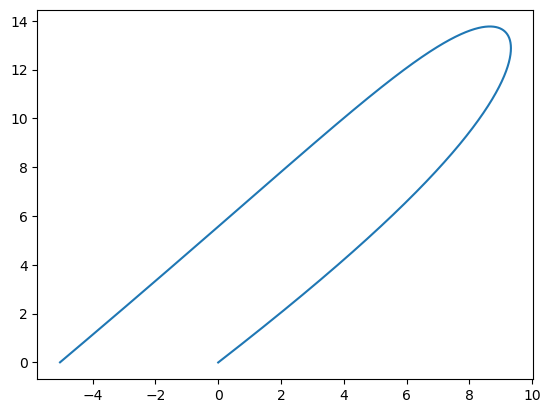

In [63]:
plt.plot(sol_list[0], sol_list[1])
plt.show()